In [1]:
import tensorflow as tf
import os

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [12]:
os.path.join('data','happy')

'data\\happy'

In [21]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [22]:
data_dir ='data'

In [23]:
image_exts=['jpeg','jpg','bmp','png']

In [25]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

In [27]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [28]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [29]:
data_iterator = data.as_numpy_iterator()

In [30]:
batch = data_iterator.next()

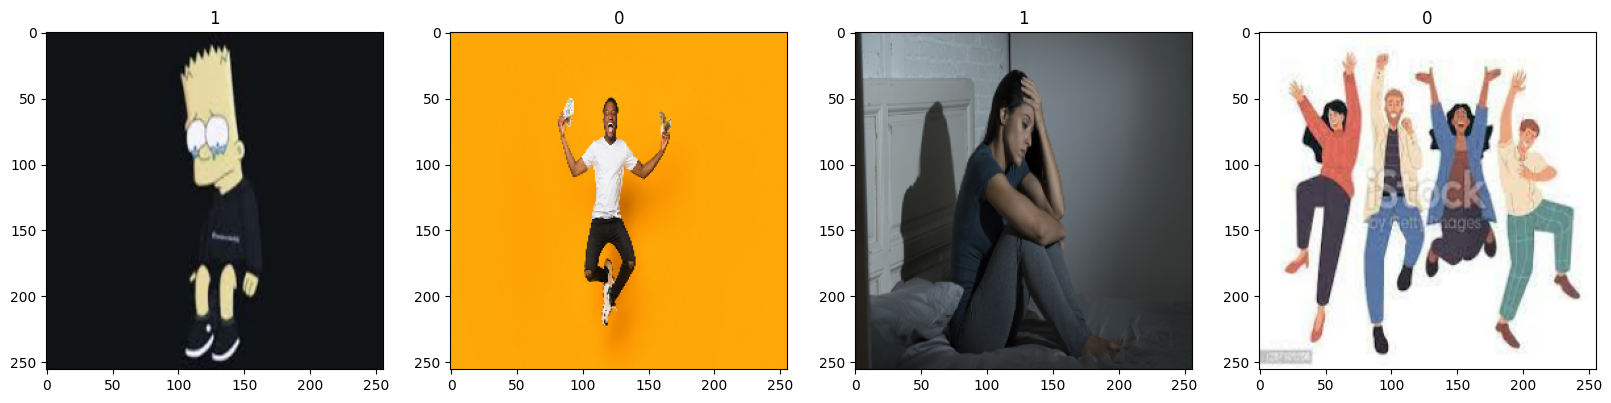

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [32]:
data = data.map(lambda x,y: (x/255, y))

In [33]:
data.as_numpy_iterator().next()

(array([[[[0.07058824, 0.93333334, 0.9882353 ],
          [0.07025123, 0.9265931 , 0.9855392 ],
          [0.06871936, 0.89595586, 0.9732843 ],
          ...,
          [0.11596201, 0.7344669 , 0.962837  ],
          [0.1205576 , 0.7206801 , 0.9643689 ],
          [0.12156863, 0.7176471 , 0.9647059 ]],
 
         [[0.07395833, 0.922886  , 0.9868873 ],
          [0.0739399 , 0.91658026, 0.9845677 ],
          [0.07385613, 0.8879177 , 0.9740242 ],
          ...,
          [0.10912703, 0.7164948 , 0.9539326 ],
          [0.11214288, 0.70086503, 0.95309484],
          [0.11280637, 0.6974265 , 0.95291054]],
 
         [[0.08927696, 0.8753983 , 0.9807598 ],
          [0.09070662, 0.87106717, 0.9801516 ],
          [0.09720507, 0.85138035, 0.9773871 ],
          ...,
          [0.07805894, 0.6348034 , 0.9134579 ],
          [0.07389419, 0.6107963 , 0.90184927],
          [0.07297794, 0.6055147 , 0.89929533]],
 
         ...,
 
         [[0.08048407, 0.6860907 , 0.98039216],
          [0.08048

In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [37]:
train_size, val_size, test_size

(7, 2, 1)

In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [40]:
train, val, test

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [46]:
logdir='logs'

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 7s 695ms/step - loss: 0.7380 - accuracy: 0.5179 - val_loss: 0.6346 - val_accuracy: 0.5938
Epoch 2/20
7/7 [==============================] - 6s 667ms/step - loss: 0.6162 - accuracy: 0.7009 - val_loss: 0.5275 - val_accuracy: 0.7656
Epoch 3/20
7/7 [==============================] - 6s 683ms/step - loss: 0.4619 - accuracy: 0.7634 - val_loss: 0.3607 - val_accuracy: 0.8594
Epoch 4/20
7/7 [==============================] - 6s 662ms/step - loss: 0.4180 - accuracy: 0.8348 - val_loss: 0.3787 - val_accuracy: 0.8906
Epoch 5/20
7/7 [==============================] - 6s 666ms/step - loss: 0.3641 - accuracy: 0.8661 - val_loss: 0.2875 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 6s 670ms/step - loss: 0.2469 - accuracy: 0.9464 - val_loss: 0.1879 - val_accuracy: 0.9531
Epoch 7/20
7/7 [==============================] - 6s 669ms/step - loss: 0.2075 - accuracy: 0.9018 - val_loss: 0.1114 - val_accuracy: 0.9688
Epoch 8/20
7/7 [====

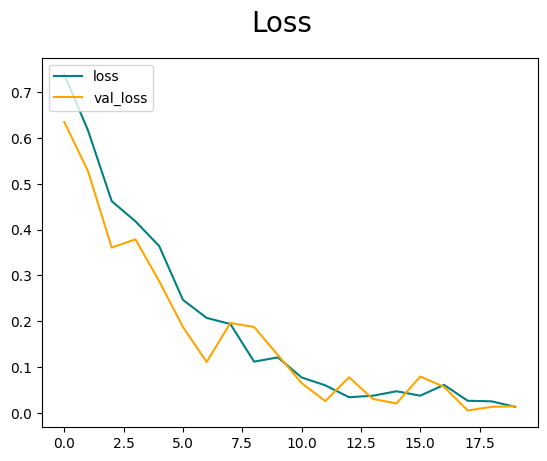

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

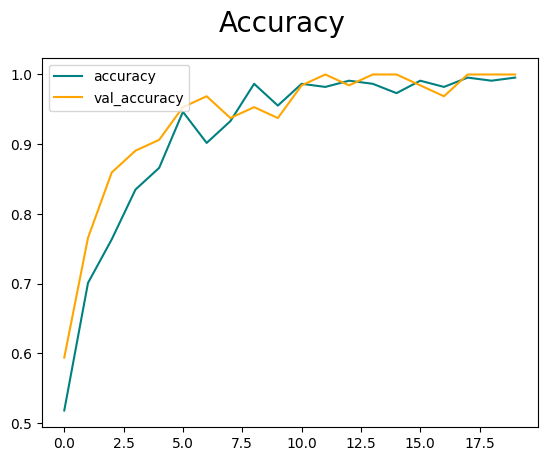

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    Precision().update_state(y, yhat)
    Recall().update_state(y, yhat)
    BinaryAccuracy().update_state(y, yhat)

1/1 [==============================] - 0s 133ms/step


In [53]:
print(Precision().result(), Recall().result(), BinaryAccuracy().result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


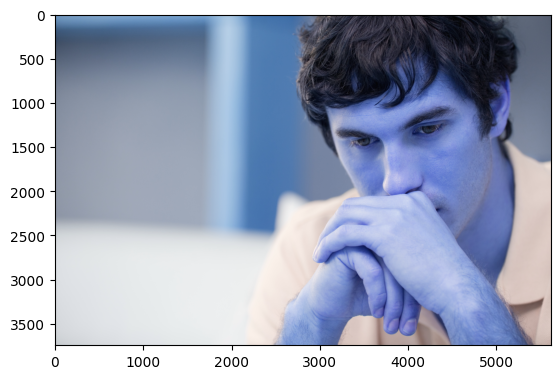

In [62]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

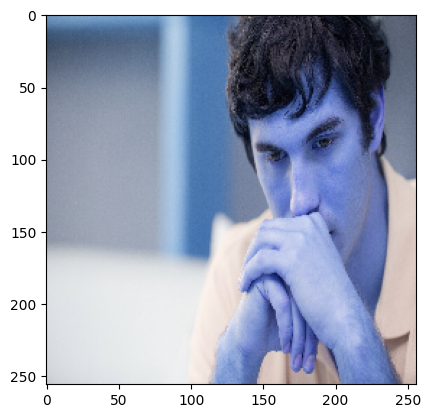

In [63]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [65]:
yhat

array([[0.9992708]], dtype=float32)

In [66]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
